In [60]:
#Importing Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from scipy.stats import yeojohnson
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
# load dataset
df = pd.read_csv('dataset/train.csv')

In [62]:
# show dataset 5 teratas
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [63]:
# show dataset 5 terbawah
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [64]:
# ringkasan statistik
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## EDA

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [66]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [67]:
df.duplicated().sum()

45

In [68]:
# Mengecek apakah ada data duplikat di setiap kolom
columns_with_duplicates = df.apply(lambda x: x.duplicated().any())

# Menampilkan kolom yang memiliki data duplikat
print(columns_with_duplicates)


age                True
workclass          True
fnlwgt             True
education          True
educational-num    True
marital-status     True
occupation         True
relationship       True
race               True
gender             True
capital-gain       True
capital-loss       True
hours-per-week     True
native-country     True
income_>50K        True
dtype: bool


In [69]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

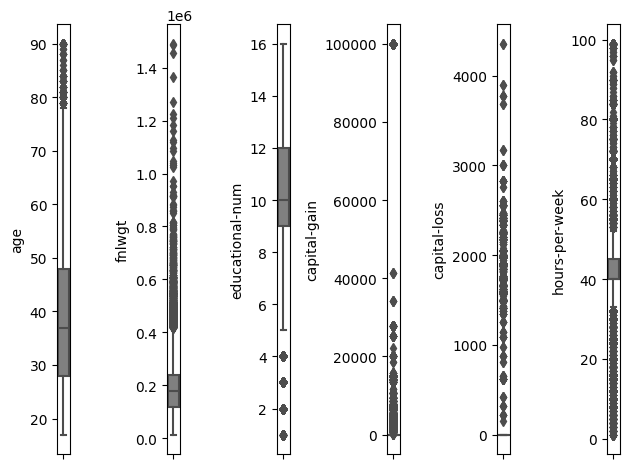

In [70]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [71]:
# Pisahkan kolom-kolom berdasarkan tipe data object
kolom_kategorikal = df.select_dtypes(include=['object'])

In [72]:
kolom_kategorikal.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,United-States
1,Private,12th,Never-married,Other-service,Own-child,White,Male,United-States
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
3,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
4,State-gov,Some-college,Never-married,Other-service,Not-in-family,Black,Male,United-States


In [73]:
# melihat fitur kateorikal yang unik
workclass = kolom_kategorikal['workclass'].nunique()
education = kolom_kategorikal['education'].unique()
marital_status = kolom_kategorikal['marital-status'].nunique()
occupation = kolom_kategorikal['occupation'].unique()
relationship = kolom_kategorikal['relationship'].nunique()
race = kolom_kategorikal['race'].unique()
gender = kolom_kategorikal['gender'].nunique()
native_country = kolom_kategorikal['native-country'].unique()


print(gender)

2


## Pre - Processing

In [74]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [75]:
# karena sedikit, dapat kita drop untuk yang native-county
df.dropna(inplace=True, subset=['native-country'])
df.dropna(inplace=True, subset=['workclass'])
df.dropna(inplace=True, subset=['occupation'])

In [76]:
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
# df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
# df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

In [77]:
# cek kekosongan data 
df.isna().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income_>50K        False
dtype: bool

In [78]:
# drop duplikasi data
df = df.drop_duplicates(keep='first')

In [79]:
# cek duplikasi data 
df.duplicated().any()

False

In [80]:
# #Trasnformasi menggunakan yeo-jhonson
# pt = PowerTransformer(method='yeo-johnson')
# df[nums] = pt.fit_transform(df[nums])

In [81]:
df[nums].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,40686.000000,4.068600e+04,40686.000000,40686.000000,40686.000000,40686.000000
mean,38.529101,1.897858e+05,10.114585,1119.767217,89.333382,40.912796
std,13.240418,1.059153e+05,2.555784,7643.607251,406.763825,12.014326
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782635e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.380632e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [82]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui setiap kolom
for kolom in df.columns:
    if df[kolom].dtype == 'object':  # Memeriksa jika kolom adalah tipe data objek (kategorikal)
        df[kolom] = label_encoder.fit_transform(df[kolom])

In [83]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,2,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,2,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,2,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,5,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,5,149248,15,10,4,7,1,2,1,0,0,40,38,0


In [84]:
# features scaling menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [85]:
# cek data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0.684932,0.333333,0.238967,0.666667,1.000000,0.000000,0.230769,0.2,1.0,1.0,1.0,0.0,0.602041,0.95,1.0
1,0.000000,0.333333,0.156482,0.133333,0.466667,0.666667,0.538462,0.6,1.0,1.0,0.0,0.0,0.142857,0.95,0.0
2,0.191781,0.333333,0.108814,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.397959,0.95,1.0
3,0.561644,0.833333,0.065479,0.333333,0.200000,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,0.397959,0.95,0.0
4,0.109589,0.833333,0.091919,1.000000,0.600000,0.666667,0.538462,0.2,0.5,1.0,0.0,0.0,0.397959,0.95,0.0


## Spliting Data

In [86]:
# pemisahan features vs target
X = df.drop(columns = 'income_>50K', axis=1)
y = df['income_>50K'].values

In [87]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.684932,0.333333,0.238967,0.666667,1.000000,0.000000,0.230769,0.2,1.0,1.0,1.0,0.0,0.602041,0.95
1,0.000000,0.333333,0.156482,0.133333,0.466667,0.666667,0.538462,0.6,1.0,1.0,0.0,0.0,0.142857,0.95
2,0.191781,0.333333,0.108814,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.397959,0.95
3,0.561644,0.833333,0.065479,0.333333,0.200000,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,0.397959,0.95
4,0.109589,0.833333,0.091919,1.000000,0.600000,0.666667,0.538462,0.2,0.5,1.0,0.0,0.0,0.397959,0.95


In [88]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
y_train

array([1., 0., 0., ..., 0., 1., 1.])

## Modeling 

In [90]:
from keras.models import Sequential
from keras.layers import Dense

# Membuat model Sequential
model = Sequential()

# Input Layer
model.add(Dense(16, activation='relu', input_shape=(14, )))

# Hidden Layer
model.add(Dense(units=16, activation='relu'))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Aktivasi sigmoid untuk binary classification


In [91]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                240       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
# Train the model
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1018/1018 [==============================] - 2s 958us/step - loss: 0.4601 - accuracy: 0.7894 - val_loss: 0.3961 - val_accuracy: 0.8147
Epoch 2/100
1018/1018 [==============================] - 1s 889us/step - loss: 0.3858 - accuracy: 0.8202 - val_loss: 0.3573 - val_accuracy: 0.8270
Epoch 3/100
1018/1018 [==============================] - 1s 887us/step - loss: 0.3581 - accuracy: 0.8308 - val_loss: 0.3510 - val_accuracy: 0.8331
Epoch 4/100
1018/1018 [==============================] - 1s 890us/step - loss: 0.3472 - accuracy: 0.8371 - val_loss: 0.3339 - val_accuracy: 0.8391
Epoch 5/100
1018/1018 [==============================] - 1s 891us/step - loss: 0.3424 - accuracy: 0.8397 - val_loss: 0.3269 - val_accuracy: 0.8428
Epoch 6/100
1018/1018 [==============================] - 1s 879us/step - loss: 0.3406 - accuracy: 0.8387 - val_loss: 0.3248 - val_accuracy: 0.8432
Epoch 7/100
1018/1018 [==============================] - 1s 881us/step - loss: 0.3389 - accuracy: 0.8402 - val_loss: 0

In [94]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Test loss: 0.3124, Test accuracy: 0.8519


In [95]:
# Evaluasi model pada data uji
hasil_evaluasi = model.evaluate(X_test, y_test)

# Hasil evaluasi
loss = hasil_evaluasi[0]
accuracy = hasil_evaluasi[1]
print("Loss:", loss)
print(f'Test accuracy: {accuracy:.4f}')


255/255 [==============================] - 0s 633us/step - loss: 0.3124 - accuracy: 0.8519
Loss: 0.3124120831489563
Test accuracy: 0.8519


In [96]:
from sklearn.metrics import classification_report

# Prediksi pada data uji
hasil_prediksi = model.predict(X_test)

# Ubah hasil prediksi menjadi label (misalnya, dengan threshold 0.5 untuk binary classification)
hasil_prediksi_label = (hasil_prediksi > 0.5).astype(int)

# Laporan klasifikasi
laporan_klasifikasi = classification_report(y_test, hasil_prediksi_label)

print("Laporan Klasifikasi:\n", laporan_klasifikasi)


255/255 [==============================] - 0s 550us/step
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      6137
         1.0       0.76      0.59      0.66      2001

    accuracy                           0.85      8138
   macro avg       0.82      0.76      0.78      8138
weighted avg       0.85      0.85      0.85      8138



## Predict

In [97]:
# Baca data uji dari file CSV
data_uji = pd.read_csv('dataset/test.csv')


In [98]:
data_uji.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [99]:
# lakukan premosesan data

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui setiap kolom
for kolom in data_uji.columns:
    if data_uji[kolom].dtype == 'object':  # Memeriksa jika kolom adalah tipe data objek (kategorikal)
        data_uji[kolom] = label_encoder.fit_transform(data_uji[kolom])

In [100]:
# features scaling menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_uji = pd.DataFrame(scaler.fit_transform(data_uji), columns=data_uji.columns)

In [101]:
#cek hasil pemrosesan data
data_uji.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.8,0.365581,0.733333,0.533333,0.333333,0.153846,0.0,1.0,1.0,0.0,0.0,0.391753,0.785714
1,0.205479,0.4,0.121739,0.466667,0.733333,0.333333,0.153846,0.0,1.0,1.0,0.0,0.0,0.412371,1.000000
2,0.410959,0.4,0.252561,0.733333,0.533333,0.333333,0.153846,0.0,0.5,1.0,0.0,0.0,0.391753,1.000000
3,0.027397,0.4,0.421967,0.133333,0.466667,0.666667,0.384615,0.6,1.0,1.0,0.0,0.0,0.185567,1.000000
4,0.397260,0.8,0.346577,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.391753,1.000000


In [102]:
from sklearn.metrics import classification_report

# Prediksi pada data uji
prediksi_test = model.predict(data_uji)

# Ubah hasil prediksi menjadi label (misalnya, dengan threshold 0.5 untuk binary classification)
prediksi_test_label = (hasil_prediksi > 0.5).astype(int)


29/29 [==============================] - 0s 584us/step


In [103]:
# Laporan klasifikasi
laporan_klasifikasi = classification_report(y_test, prediksi_test_label)

print("Laporan Klasifikasi:\n", laporan_klasifikasi)

Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      6137
         1.0       0.76      0.59      0.66      2001

    accuracy                           0.85      8138
   macro avg       0.82      0.76      0.78      8138
weighted avg       0.85      0.85      0.85      8138

